In [ ]:
#https://betterprogramming.pub/how-to-use-artificial-intelligence-and-twitter-to-detect-fake-news-a-python-tutorial-75a4132acf7f
#https://towardsdatascience.com/identifying-fake-news-the-liar-dataset-713eca8af6ac

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/BTP/

/content/drive/MyDrive/BTP


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
# import nlpaug.augmenter.char as nac
from gensim.models import Word2Vec
# import nlpaug.augmenter.word as naw
from sklearn.preprocessing import OneHotEncoder
# import nlpaug.augmenter.sentence as nas
# import nlpaug.flow as nafc
# from textaugment import Wordnet
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
# from nlpaug.util import Action
from bs4 import BeautifulSoup
import re
import pickle
# from textaugment import EDA

In [ ]:
# import nltk
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
t = Wordnet()
t1 = EDA()

In [ ]:
data = pd.read_csv('./final2_train.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [ ]:
data.head()

,Statement,Subject,Speaker,Speaker Job Title,State info,Party,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.0,0.0,0.0,a mailer
1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1.0,1.0,0.0,a floor speech.
2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160.0,163.0,9.0,Denver
3,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,3.0,5.0,44.0,a news release
4,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20.0,19.0,2.0,an interview on CNN


In [ ]:
def augment(data):
    for a,b,c,d,e,f,g,h,i,j,k,l,m in zip(data['Label'], data['Statement'], data['Subject'], data['Speaker'], data['Speaker Job Title'], data['State info'], data['Party'], data['barely true counts'], data['false counts'], data['half true counts'], data['mostly true counts'], data['pants on fire counts'], data['context']):
        a1 = t.augment(b)
        data = data.append({'Statement':a1, 'Label': a, 'Subject':c, 'Speaker':d, 'Speaker Job Title':e, 'State info':f, 'Party':g, 'barely true counts':h, 'false counts':i, 'half true counts':j, 'mostly true counts':k, 'pants on fire counts':l, 'context':m }, ignore_index=True)
        a2 = t1.random_swap(b)
        data = data.append({'Statement':a2, 'Label': a, 'Subject':c, 'Speaker':d, 'Speaker Job Title':e, 'State info':f, 'Party':g, 'barely true counts':h, 'false counts':i, 'half true counts':j, 'mostly true counts':k, 'pants on fire counts':l, 'context':m }, ignore_index=True)
        aug = naw.SynonymAug(aug_src='wordnet')
        a3 = aug.augment(b)
        data = data.append({'Statement':a3, 'Label': a, 'Subject':c, 'Speaker':d, 'Speaker Job Title':e, 'State info':f, 'Party':g, 'barely true counts':h, 'false counts':i, 'half true counts':j, 'mostly true counts':k, 'pants on fire counts':l, 'context':m }, ignore_index=True)
    return data

In [ ]:
y = data['Label']
data.drop(['Label'], axis = 1, inplace=True)
X = data

In [ ]:
train_data, test_data, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33, stratify=y)
train_data, valid_data, y_train, y_valid = train_test_split(train_data, y_train, test_size=0.1, random_state=33, stratify=y_train)


In [ ]:
# train_data = augment(train_data)

In [ ]:
train_data['Label'].value_counts()

half-true      8456
FALSE          7972
mostly-true    7848
pants-fire     6712
TRUE           6704
barely-true    6616
Name: Label, dtype: int64

<AxesSubplot:title={'center':'Count (Labels)'}>

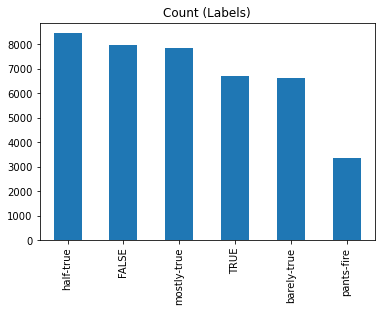

In [ ]:
train_data['Label'].value_counts().plot(kind='bar', title='Count (Labels)')

In [ ]:
def duplicate(data):
    for a,b,c,d,e,f,g,h,i,j,k,l,m in zip(data['Label'], data['Statement'], data['Subject'], data['Speaker'], data['Speaker Job Title'], data['State info'], data['Party'], data['barely true counts'], data['false counts'], data['half true counts'], data['mostly true counts'], data['pants on fire counts'], data['context']): 
        if a=='pants-fire':
            aug = naw.SynonymAug(aug_src='wordnet')
            a3 = aug.augment(b)
            data = data.append({'Statement':a3, 'Label': a, 'Subject':c, 'Speaker':d, 'Speaker Job Title':e, 'State info':f, 'Party':g, 'barely true counts':h, 'false counts':i, 'half true counts':j, 'mostly true counts':k, 'pants on fire counts':l, 'context':m }, ignore_index=True)
    return data

In [ ]:
# train_data = duplicate(train_data)

<AxesSubplot:title={'center':'Count (Labels)'}>

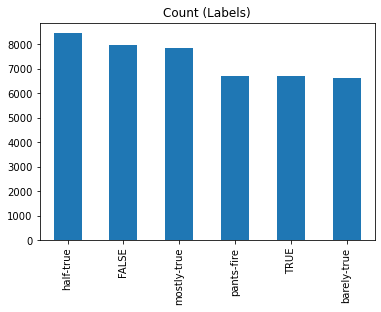

In [ ]:
train_data['Label'].value_counts().plot(kind='bar', title='Count (Labels)')

In [ ]:
# train_data.to_csv('final1_train.csv')

In [ ]:
LE = preprocessing.LabelEncoder()
y_train = LE.fit_transform(y_train)
y_test = LE.fit_transform(y_test)
y_valid = LE.fit_transform(y_valid)

In [ ]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess(data):
    preprocessed_statement = []
    for sentance in tqdm(data['Statement'].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
        preprocessed_statement.append(sentance.strip())
    return preprocessed_statement

In [ ]:
train_preprocessed_text = preprocess(train_data)
test_preprocessed_text = preprocess(test_data)
valid_preprocessed_text = preprocess(valid_data)

100%|██████████| 4218/4218 [00:01<00:00, 2555.08it/s]


In [ ]:
    
vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1,4), max_features=5000)
vocab = vectorizer.fit(train_preprocessed_text)


In [ ]:

X_train_statement = vectorizer.transform(train_preprocessed_text)
X_test_statement = vectorizer.transform(test_preprocessed_text)
X_valid_statement = vectorizer.transform(valid_preprocessed_text)

In [ ]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
tfidf_words = set(vectorizer.get_feature_names())

In [ ]:
def w2v_tfidf(data):
    
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
              # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return np.array(tfidf_w2v_vectors)

In [ ]:
train_tfidfWW2Vec = w2v_tfidf(train_preprocessed_text)
test_tfidfWW2Vec = w2v_tfidf(test_preprocessed_text)
valid_tfidfWW2Vec = w2v_tfidf(valid_preprocessed_text)

100%|██████████| 4218/4218 [00:00<00:00, 13226.95it/s]


In [ ]:
def preprocess_cat(data):
    preprocessed_cat = []
    for sentance in tqdm(data):
        if type(sentance)!= str:
            preprocessed_cat.append('None')
        else:
            sentance = re.sub('-', ' ', sentance)
            sentance = re.sub(',', ' ', sentance)
            # https://gist.github.com/sebleier/554280
            preprocessed_cat.append(sentance.strip())
    return preprocessed_cat

In [ ]:
train_data['Subject'] = preprocess_cat(train_data['Subject'].values)
test_data['Subject'] = preprocess_cat(test_data['Subject'].values)
valid_data['Subject'] = preprocess_cat(valid_data['Subject'].values)

100%|██████████| 4686/4686 [00:00<00:00, 328670.71it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 4218/4218 [00:00<00:00, 254679.62it/s]


In [ ]:
train_data['Speaker'] = preprocess_cat(train_data['Speaker'].values)
test_data['Speaker'] = preprocess_cat(test_data['Speaker'].values)
valid_data['Speaker'] = preprocess_cat(valid_data['Speaker'].values)

100%|██████████| 4686/4686 [00:00<00:00, 370099.58it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 4218/4218 [00:00<00:00, 282400.98it/s]


In [ ]:
train_data['Speaker Job Title'] = preprocess_cat(train_data['Speaker Job Title'].values)
test_data['Speaker Job Title'] = preprocess_cat(test_data['Speaker Job Title'].values)
valid_data['Speaker Job Title'] = preprocess_cat(valid_data['Speaker Job Title'].values)

100%|██████████| 4686/4686 [00:00<00:00, 477874.70it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 4218/4218 [00:00<00:00, 356038.93it/s]


In [ ]:
train_data['State info'] = preprocess_cat(train_data['State info'].values)
test_data['State info'] = preprocess_cat(test_data['State info'].values)
valid_data['State info'] = preprocess_cat(valid_data['State info'].values)

100%|██████████| 4686/4686 [00:00<00:00, 455894.15it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 4218/4218 [00:00<00:00, 381695.24it/s]


In [ ]:
train_data['Party'] = preprocess_cat(train_data['Party'].values)
test_data['Party'] = preprocess_cat(test_data['Party'].values)
valid_data['Party'] = preprocess_cat(valid_data['Party'].values)

100%|██████████| 4686/4686 [00:00<00:00, 360210.19it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 4218/4218 [00:00<00:00, 412400.62it/s]


In [ ]:
train_data['context'] = preprocess_cat(train_data['context'].values)
test_data['context'] = preprocess_cat(test_data['context'].values)
valid_data['context'] = preprocess_cat(valid_data['context'].values)

100%|██████████| 4686/4686 [00:00<00:00, 360236.59it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 4218/4218 [00:00<00:00, 208413.23it/s]


In [ ]:
train_data.head(2)

,Statement,Subject,Speaker,Speaker Job Title,State info,Party,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
34378,Illegal immigrants cut down the grass around t...,economy immigration jobs,facebook posts,Social media posting,None,none,14,18,15.0,11.0,36.0,a Facebook comment
31669,"In April 2009 the Democrat be in control, and ...",polls,nancy pelosi,House Minority Leader,California,democrat,3,7,11.0,2.0,3.0,"an interview with Jon Stewart on ""The Daily Show"""


In [ ]:
# train_data.isnull().sum()

In [ ]:
enc = CountVectorizer()
enc.fit(train_data['Subject'].values)
train_subject = enc.transform(train_data['Subject'].values)
test_subject = enc.transform(test_data['Subject'].values)
valid_subject = enc.transform(valid_data['Subject'].values)

In [ ]:
enc = CountVectorizer()
enc.fit(train_data['Speaker'].values)
train_speaker = enc.transform(train_data['Speaker'].values)
test_speaker = enc.transform(test_data['Speaker'].values)
valid_speaker = enc.transform(valid_data['Speaker'].values)

In [ ]:
enc = CountVectorizer()
enc.fit(train_data['Speaker Job Title'].values)
train_jtitle = enc.transform(train_data['Speaker Job Title'].values)
test_jtitle = enc.transform(test_data['Speaker Job Title'].values)
valid_jtitle = enc.transform(valid_data['Speaker Job Title'].values)

In [ ]:
enc = CountVectorizer()
enc.fit(train_data['State info'].values)
train_state = enc.transform(train_data['State info'].values)
test_state = enc.transform(test_data['State info'].values)
valid_state = enc.transform(valid_data['State info'].values)

In [ ]:
enc = CountVectorizer()
enc.fit(train_data['Party'].values)
train_party = enc.transform(train_data['Party'].values)
test_party = enc.transform(test_data['Party'].values)
valid_party = enc.transform(valid_data['Party'].values)

In [ ]:
enc = CountVectorizer()
enc.fit(train_data['context'].values)
train_context = enc.transform(train_data['context'].values)
test_context = enc.transform(test_data['context'].values)
valid_context = enc.transform(valid_data['context'].values)

In [ ]:
le = preprocessing.LabelEncoder()

le.fit(train_data['barely true counts'].values)

train_btc= le.transform(train_data['barely true counts'].values)
test_btc = le.transform(test_data['barely true counts'].values)
valid_btc = le.transform(valid_data['barely true counts'].values)



In [ ]:
le = preprocessing.LabelEncoder()

le.fit(train_data['false counts'].values.reshape(-1,1))

train_fc= le.transform(train_data['false counts'].values.reshape(-1,1))
test_fc = le.transform(test_data['false counts'].values.reshape(-1,1))
valid_fc = le.transform(valid_data['false counts'].values.reshape(-1,1))



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
le = preprocessing.Normalizer()

le.fit(train_data['half true counts'].values.reshape(-1,1))

train_htc= le.transform(train_data['half true counts'].values.reshape(-1,1))
test_htc = le.transform(test_data['half true counts'].values.reshape(-1,1))
valid_htc = le.transform(valid_data['half true counts'].values.reshape(-1,1))



In [ ]:
le = preprocessing.Normalizer()

le.fit(train_data['mostly true counts'].values.reshape(-1,1))

train_mtc= le.transform(train_data['mostly true counts'].values.reshape(-1,1))
test_mtc = le.transform(test_data['mostly true counts'].values.reshape(-1,1))
valid_mtc = le.transform(valid_data['mostly true counts'].values.reshape(-1,1))



In [ ]:
le = preprocessing.Normalizer()
le.fit(train_data['pants on fire counts'].values.reshape(-1,1))

train_pfc= le.transform(train_data['pants on fire counts'].values.reshape(-1,1))
test_pfc = le.transform(test_data['pants on fire counts'].values.reshape(-1,1))
valid_pfc = le.transform(valid_data['pants on fire counts'].values.reshape(-1,1))



In [ ]:
train_tfidfWW2Vec.shape
train_subject.shape
train_speaker.shape
train_btc.shape

(44308,)

In [ ]:
X_train = hstack((train_tfidfWW2Vec, train_subject, train_speaker, train_jtitle, train_state, train_party, train_context, train_btc.reshape(-1,1), train_fc.reshape(-1,1), train_htc.reshape(-1,1), train_mtc.reshape(-1,1), train_pfc.reshape(-1,1))).tocsr()

In [ ]:
X_test = hstack((test_tfidfWW2Vec, test_subject, test_speaker, test_jtitle, test_state, test_party, test_context, test_btc.reshape(-1,1), test_fc.reshape(-1,1), test_htc.reshape(-1,1), test_mtc.reshape(-1,1), test_pfc.reshape(-1,1))).tocsr()

In [ ]:
X_valid = hstack((valid_tfidfWW2Vec, valid_subject, valid_speaker, valid_jtitle, valid_state, valid_party, valid_context, valid_btc.reshape(-1,1), valid_fc.reshape(-1,1), valid_htc.reshape(-1,1), valid_mtc.reshape(-1,1), valid_pfc.reshape(-1,1))).tocsr()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
import seaborn as sns

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
Random_scv = RandomizedSearchCV(estimator=clf, param_distributions={'max_depth':[10,50,100], 'min_samples_split':[100,200,500]}, scoring='accuracy', return_train_score=True, cv=3)
Random_scv.fit(X_train, y_train)
Random_scv.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'max_depth': 50, 'min_samples_split': 100}

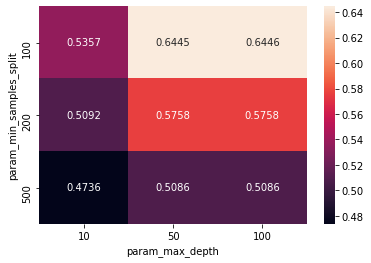

In [ ]:
results = pd.DataFrame.from_dict(Random_scv.cv_results_)
results.sort_values(by='param_min_samples_split', inplace=True)
score = results.groupby(['param_min_samples_split', 'param_max_depth']).max()
score = score.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(score.mean_train_score, annot=True, fmt='.4g');

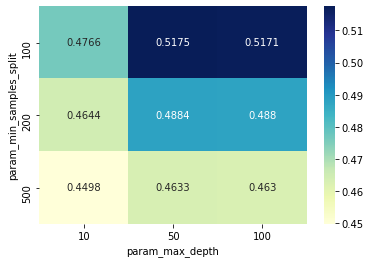

In [ ]:
sns.heatmap(score.mean_test_score, annot=True, cmap='YlGnBu', fmt='.4g');

In [ ]:
clf = DecisionTreeClassifier(max_depth = 50, min_samples_split=100, splitter='best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)

In [ ]:
accuracy_score(y_test, y_test_pred)

0.557618437900128

In [ ]:
clf = KNeighborsClassifier(weights='distance', algorithm='kd_tree')

In [ ]:
Random_scv = RandomizedSearchCV(estimator=clf, param_distributions={'n_neighbors':[5,10,15,20,50]}, scoring='accuracy', return_train_score=True, cv=3)
Random_scv.fit(X_train, y_train)
Random_scv.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("can

{'n_neighbors': 5}

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree')
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
results = pd.DataFrame.from_dict(Random_scv.cv_results_)
results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.062181,0.000096,218.582643,1.788285,5,{'n_neighbors': 5},0.860101,0.864448,0.860169,0.861573,0.002033,1,0.999921,0.99996,0.999881,0.999921,0.000032
1,0.061937,0.000379,217.965076,0.501687,10,{'n_neighbors': 10},0.827616,0.834493,0.829104,0.830404,0.002954,2,0.999921,0.99996,0.999881,0.999921,0.000032


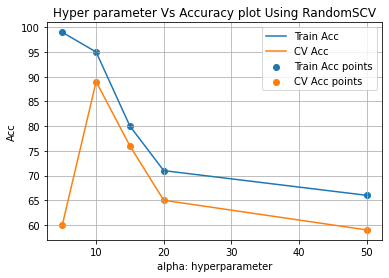

In [ ]:
# results = pd.DataFrame.from_dict(Random_scv.cv_results_)
results = results.sort_values(['param_n_neighbors'])
train_auc= [99, 95, 80, 71, 66]
cv_auc = [60, 89, 76, 65, 59] 
# results
K =  results['param_n_neighbors']

plt.plot(K, train_auc, label='Train Acc')
plt.plot(K, cv_auc, label='CV Acc')

plt.scatter(K, train_auc, label='Train Acc points')
plt.scatter(K, cv_auc, label='CV Acc points')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("Acc")
plt.title("Hyper parameter Vs Accuracy plot Using RandomSCV")
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
sgd = GradientBoostingClassifier(subsample=0.5)

In [ ]:
grid_search = GridSearchCV(estimator=sgd, param_grid={'max_depth':[1, 3], 'n_estimators':[50,100]}, scoring='accuracy', return_train_score=True, cv=3)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_ 

{'max_depth': 3, 'n_estimators': 100}

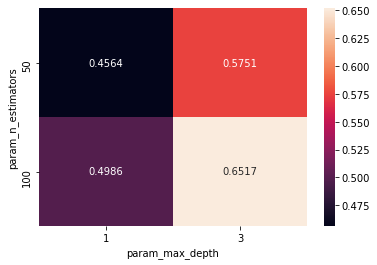

In [ ]:
results = pd.DataFrame.from_dict(grid_search.cv_results_)
# results.sort_values(by='param_min_samples_split', inplace=True)
score = results.groupby(['param_n_estimators', 'param_max_depth']).max()
score = score.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(score.mean_train_score, annot=True, fmt='.4g');

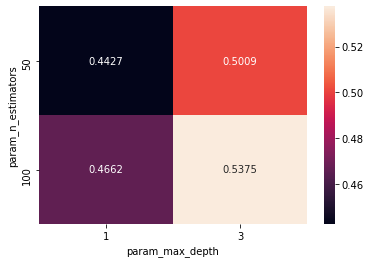

In [ ]:
sns.heatmap(score.mean_test_score, annot=True, fmt='.4g');

In [ ]:
clf = GradientBoostingClassifier(subsample=0.5, max_depth=3, n_estimators=200)
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
accuracy_score(y_train, clf.predict(X_train))